In [41]:
%reset -f

import sys
import os
import csv
import pandas as pd
import ast
import ujson
import numpy as np
import matplotlib.pyplot as plt

from scripts.plotfunctions import ottrk_to_txt
from scripts.plotfunctions import plot_BBoxes
from scripts.plotfunctions import tracklength
from scripts.plotfunctions import plot_trajectory
from scripts.plotfunctions import plot_histogram

# dirpath = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/"
# filename = "OTCamera07_FR20_2023-09-19_17-00-00_Sued"

# dirpath = "Z:/04_Daten/GroundThruth/Leipzig/OTC19"
# filename = "OTCamera19_FR20_2023-05-24_07-15-00"

dirpath = "C:/Users/ev2752/Documents/OTVision/OTVision_Extended_IOU/tests/data"
filename = "Testvideo_Luecke_FR20_2023-09-19_17-12-36_Sued"

# dirpath = "Z:/04_Daten/GroundThruth/Leipzig/OTC07"
# filename = "OTCamera07_FR20_2022-10-31_16-30-00"

# dirpath = "Z:/04_Daten/GroundThruth/Fussverkehrausfkommen/OTC07_23-09-19_17-00-00/test"
# filename = "Testvideo_Luecke_FR20_2023-09-19_17-12-36_Sued_extended_IOU"

fileending = '.ottrk'
filepath = os.path.join(dirpath, filename) + fileending

OTCdetections, metadata = ottrk_to_txt(filepath = filepath, export=False)
# plt.show(plot_BBoxes(OTCdetections, dirpath, framerate=20, trackid = 1089))

OTCdetections = OTCdetections.sort_values(by=['track-id', 'frame'])
OTCdetections = tracklength(OTCdetections)

width = metadata.loc['width', 'video']
height = metadata.loc['height', 'video']
box = [width, height]

del width, height

ottrk_to_txt...
tracklength...


### Histogramm plotten

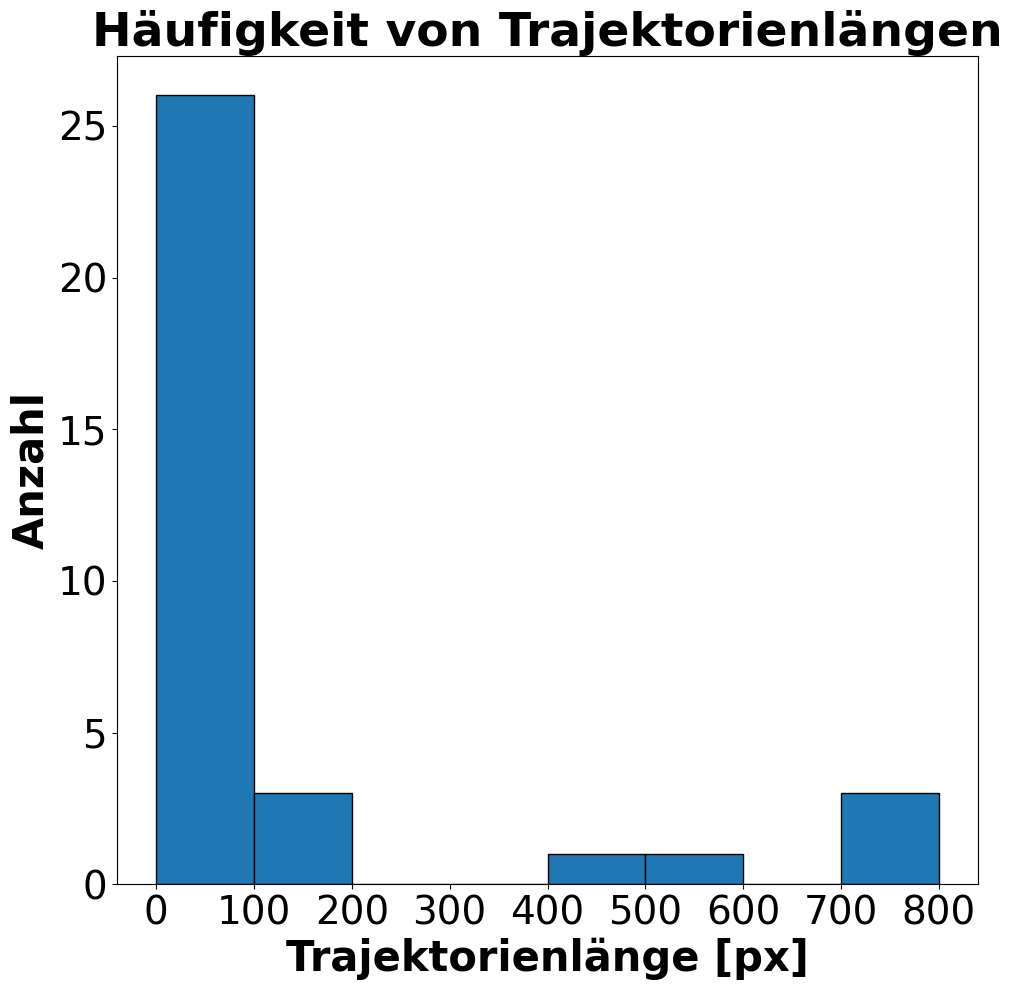

In [28]:
from scripts.plotfunctions import plot_histogram
from scripts.plotfunctions import tracklength

data = OTCdetections

data = data.sort_values(by=['track-id', 'frame'])
data = data.groupby(['track-id', 'class'])['track-length'].mean().reset_index()
data['track-length'] = data['track-length'].astype('int')
data['tracklength_class'] = pd.cut(data['track-length'], bins=20, labels=False)

# plt.show(plot_trajectory(data, dirpath))

plt.show(plot_histogram(data, 
                        # xlim=1000, 
                        binwidth=100, 
                        xText="Trajektorienlänge [px]",
                        fontsize=30,
                        titletext='Häufigkeit von Trajektorienlängen',
                        # savename='09_Histogramm_Trajektorienlaengen'
                        ))

## Trajektorien plotten

[800, 600]


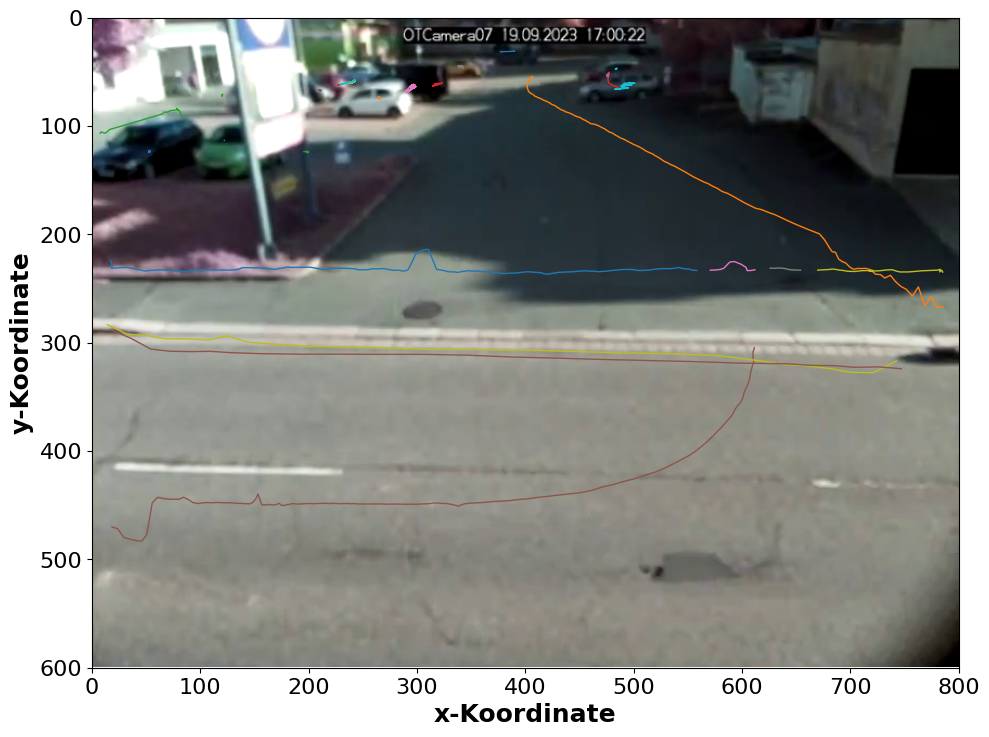

In [42]:
from scripts.plotfunctions import plot_trajectory

data = OTCdetections
plt.show(plot_trajectory(data,
                         dirpath,
                         fontsize=18,
                         box=box,
                         show_background=True,
                        #  titletext='Trajektorienlängen',
                        #  savename="10a_Trajectories_all"
                        ))

### Trajektorien <600px

[1024, 768]


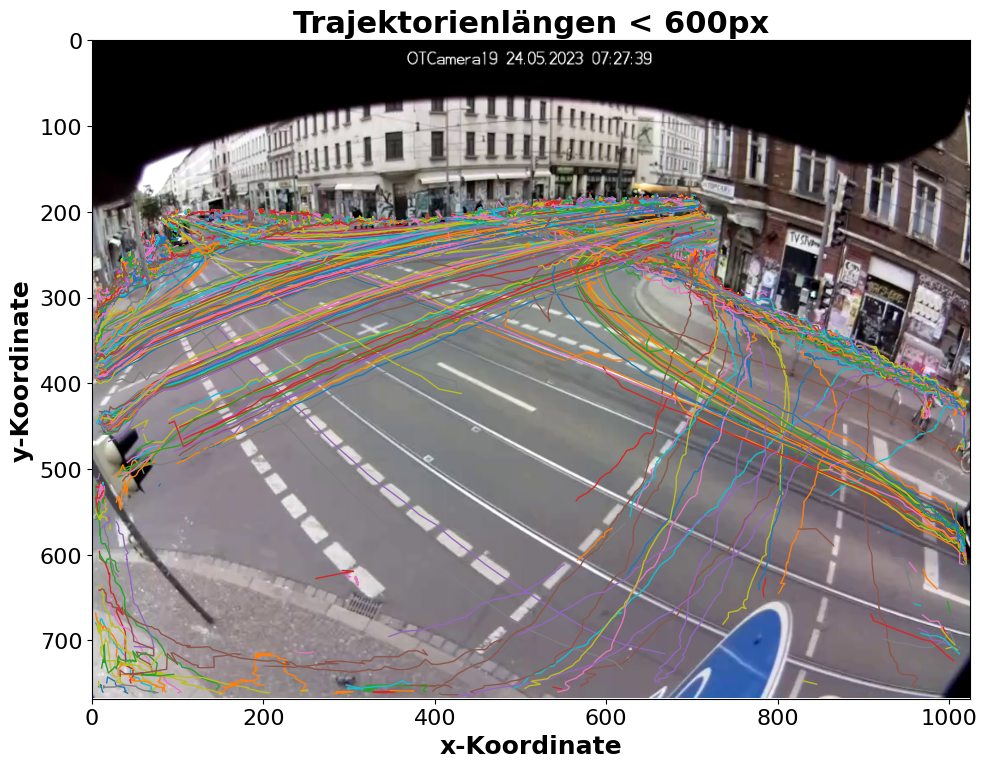

In [5]:
from scripts.plotfunctions import plot_trajectory

data = OTCdetections[OTCdetections['track-length'] < 768]
plt.show(plot_trajectory(data,
                         dirpath,
                         fontsize=18,
                         box=box,
                         show_background=True,
                         titletext='Trajektorienlängen < 600px',
                        #  savename="10a_Trajectories_smaller_600px"
                        ))

### Trajektorien >600px >=850px

[1024, 768]


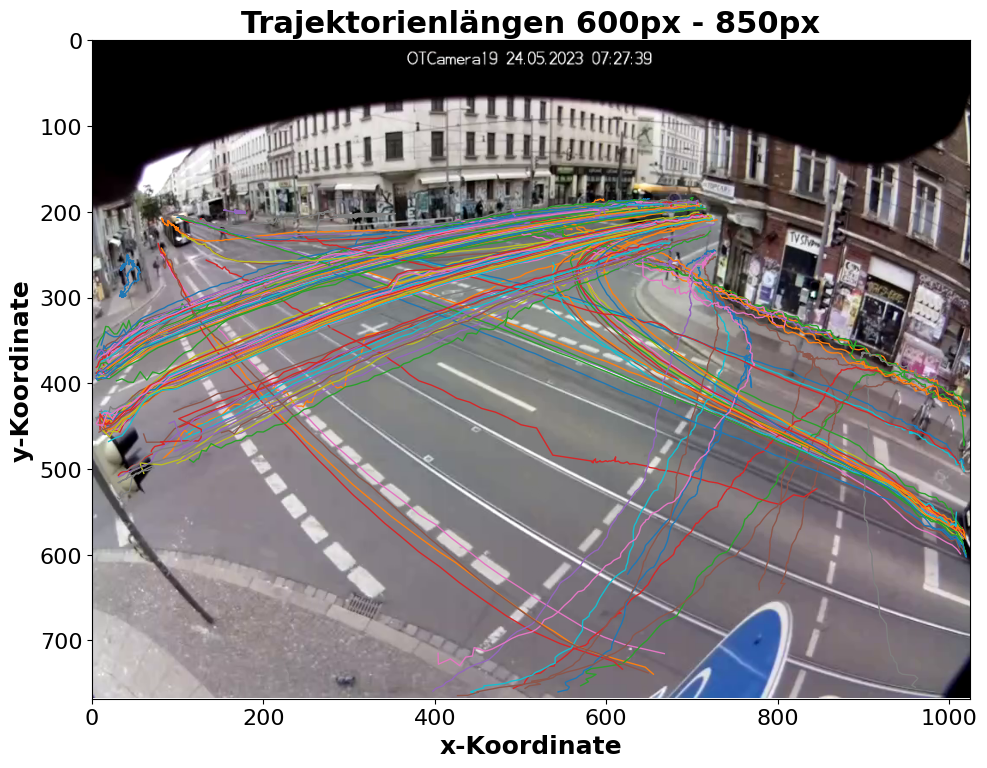

In [4]:
from scripts.plotfunctions import plot_trajectory

data = OTCdetections[OTCdetections['track-length'] > 600]
data = data[data['track-length'] < 850]

plt.show(plot_trajectory(data,
                         dirpath,
                         box=box,
                         fontsize=18,
                         show_background=True,
                         titletext='Trajektorienlängen 600px - 850px',
                        #  savename="10b_Trajectories_in_600_850px"
                         ))

### Trajektorien >850px

[1024, 768]


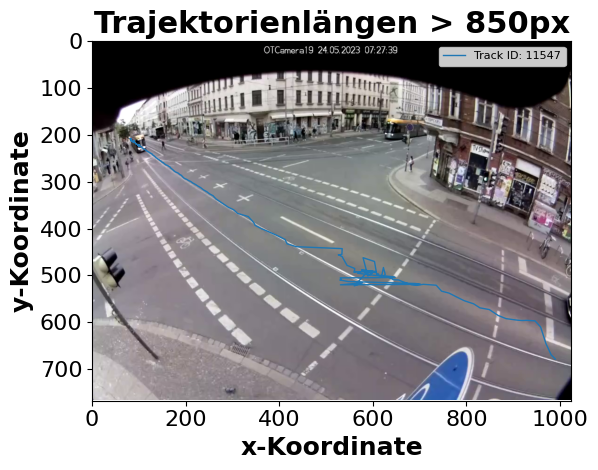

In [2]:
from scripts.plotfunctions import plot_trajectory

# data = OTCdetections[OTCdetections['track-length'] > 1300]
# data = data[data['track-length'] > 1400]

data = OTCdetections[OTCdetections['track-id'] == 11547]
plt.show(plot_trajectory(data,
                         dirpath,
                         box=box,
                         fontsize=18,
                         show_background=True,
                         titletext='Trajektorienlängen > 850px',
                         savename="10c_Trajectories_1300_1400_watisdatdenn"))

## Trackabbruch plotten

In [ ]:
data = OTCdetections
fontsize = 15
titletext = ""
savename = ""

# Tracks mit Abbruch identifizieren: Letze Zeile innerhalb der Zone
end = data.groupby(['track-id'])['frame'].max().reset_index()
end['position'] = 'end'
end = pd.merge(end, data, how= 'left', on=['track-id', 'frame'])

end = end[end['x'] > 100]
end = end[end['x'] < 700]
end = end[end['y'] > 100]
end = end[end['y'] < 500]

end = end[end['track-length'] <= 600]

# plt.show(plot_histogram(end, binwidth=20))

end = end[['track-id', 'position']]
data = pd.merge(data, end, how='left', on=['track-id'])
data= data[data['position'] == 'end']

# plt.show(plot_trajectory(data, dirpath, show_background=True, box=box))
plt.show(plot_BBoxes(data, dirpath, box=box))